# Lecture: Coping with missing data in python

At first, we are looking at a small exemplary dataset with missing values.

In [185]:
import pandas as pd

df = pd.read_csv('../../data/propertydata.csv')

print(df)

         PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000   104.0      PUTNAM            Y            3        1  1000
1  100002000   197.0   LEXINGTON            N            3      1.5    --
2  100003000     NaN   LEXINGTON            N          NaN        1   850
3  100004000   201.0    BERKELEY           12            1      NaN   700
4  100005000   203.0    BERKELEY            Y            3        2  1600
5  100006000   207.0    BERKELEY            Y          NaN        1   800
6  100007000     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000   213.0     TREMONT            Y            1        1   NaN
8  100009000   215.0     TREMONT            Y           na        2  1800


Since there are some inconsistent encodings of NaN values we first preprocess the data to a more consistent format by standardization.

In [186]:
df = pd.read_csv('../../data/propertydata.csv', na_values=['na', '--'])

print(df)

         PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000   201.0    BERKELEY           12           1.0      NaN   700.0
4  100005000   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000   213.0     TREMONT            Y           1.0        1     NaN
8  100009000   215.0     TREMONT            Y           NaN        2  1800.0


[]

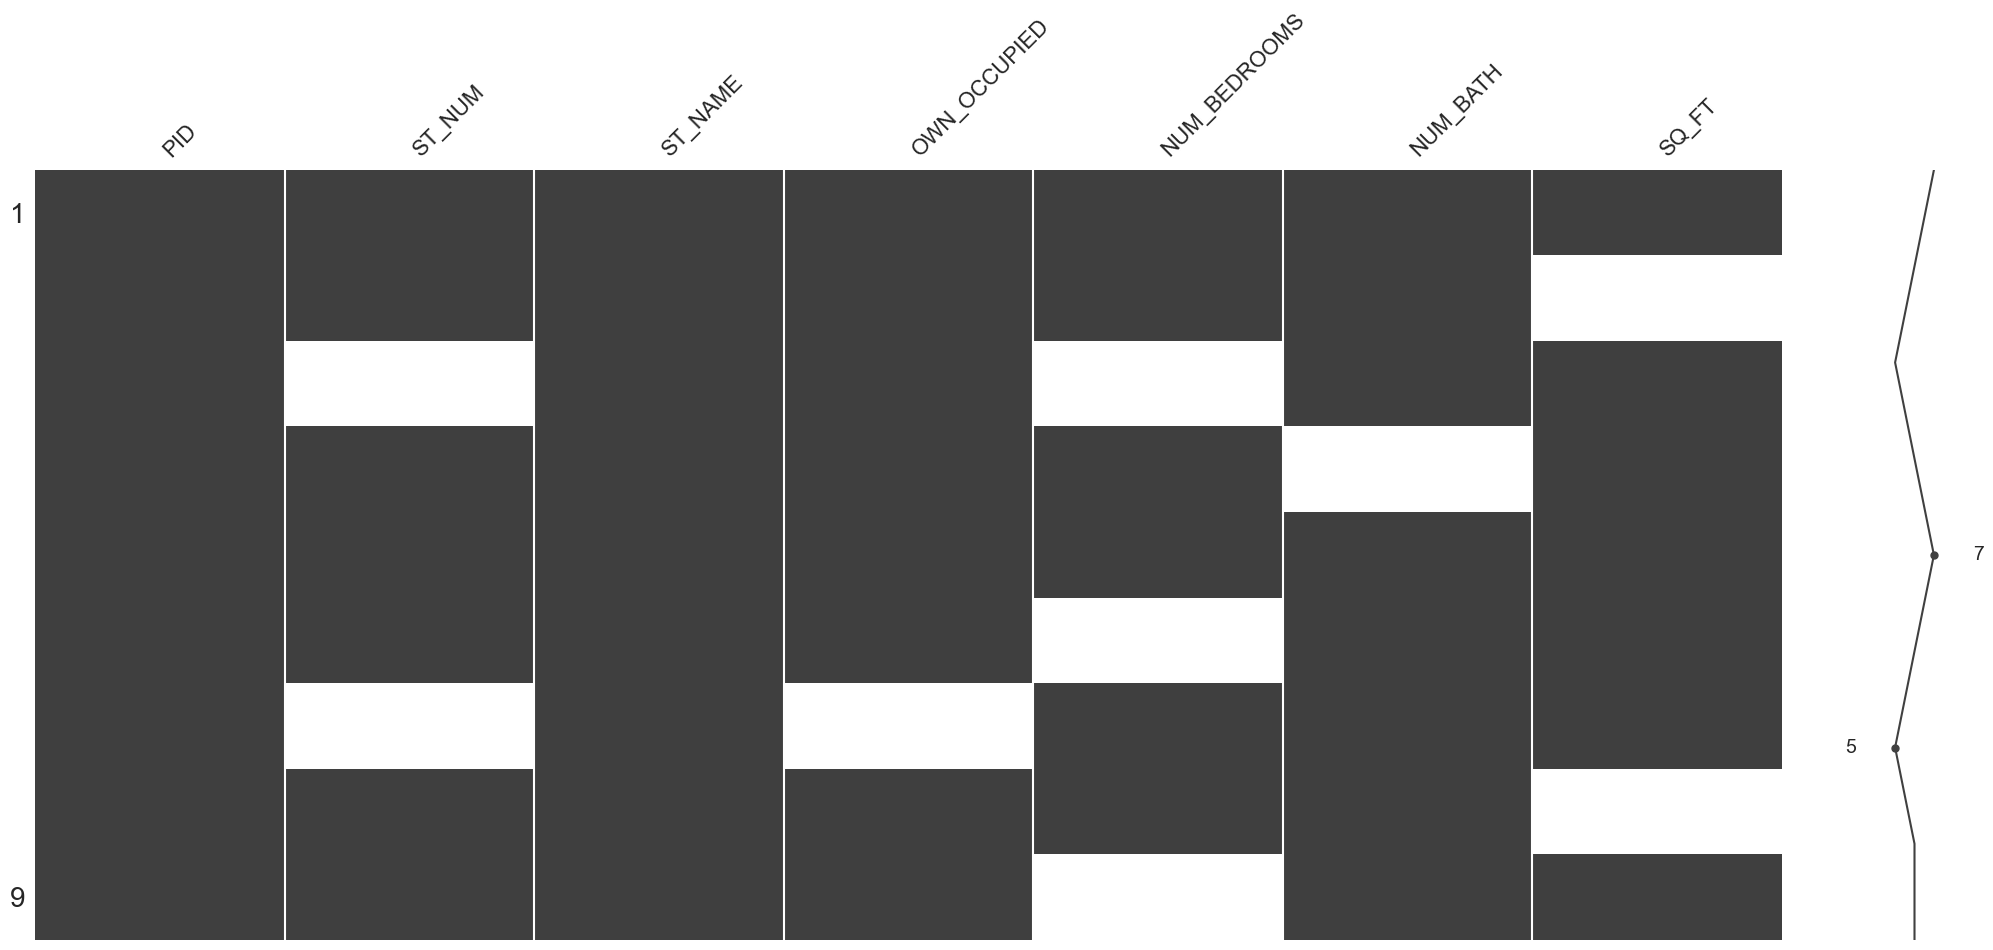

In [187]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.plot()

A very simple listwise deletion method would lead to an unsatisfactory result.

In [188]:
# Simulate listwise deletion
print(df.dropna())

         PID  ST_NUM   ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000   104.0    PUTNAM            Y           3.0        1  1000.0
4  100005000   203.0  BERKELEY            Y           3.0        2  1600.0


### The feature ST_NUM

At first, we look at the feature `ST_NUM`, the house number of the property. Obviously, it is a discrete numerical value.

In [189]:
print(df[['ST_NUM']])
df[['ST_NUM']].describe()

   ST_NUM
0   104.0
1   197.0
2     NaN
3   201.0
4   203.0
5   207.0
6     NaN
7   213.0
8   215.0


,ST_NUM
count,7.000000
mean,191.428571
std,39.080503
min,104.000000
25%,199.000000
50%,203.000000
75%,210.000000
max,215.000000


 Imputing with `mean_strategy` is questionable due to the context and requires additional rounding at the end.

In [190]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['ST_NUM']=imp_mean.fit_transform(df[['ST_NUM']])
df['ST_NUM']= df['ST_NUM'].astype(int)
print(df['ST_NUM'])

0    104
1    197
2    191
3    201
4    203
5    207
6    191
7    213
8    215
Name: ST_NUM, dtype: int32


Another possibility would be a random choice between the min and max values of the range of `ST_NUM`. This can be implemented with the `random` package and the `randint(min,max)` method.

### The feature OWN_OCCUPIED
Obviously, this is a binary categorial feature. There is not a missing entry only but also an invalid entry (number 12 in line 3).

In [191]:
print(df)

         PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000     104      PUTNAM            Y           3.0        1  1000.0
1  100002000     197   LEXINGTON            N           3.0      1.5     NaN
2  100003000     191   LEXINGTON            N           NaN        1   850.0
3  100004000     201    BERKELEY           12           1.0      NaN   700.0
4  100005000     203    BERKELEY            Y           3.0        2  1600.0
5  100006000     207    BERKELEY            Y           NaN        1   800.0
6  100007000     191  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000     213     TREMONT            Y           1.0        1     NaN
8  100009000     215     TREMONT            Y           NaN        2  1800.0


To get a consistent feature, we need to go through all the entries and get rid of false datatypes.

In [192]:
# Handle OWN_OCCUPIED
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
       # Try to cast value to int
        int(row)
        # If possible, replace that value
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1
print(df['OWN_OCCUPIED'])

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object


In [193]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['OWN_OCCUPIED']]=imp_mean.fit_transform(df[['OWN_OCCUPIED']])
print(df['OWN_OCCUPIED'])

0    Y
1    N
2    N
3    Y
4    Y
5    Y
6    Y
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: object


### The feature NUM_BATH

The same holds for this feature. We need to go through all entries and get rid of inconsistent datatypes.

In [194]:
# Handle NUM_BATH
cnt = 0
for row in df['NUM_BATH']:
    try:
        # Try to cast value to float
        int(row) #float(row)
    except ValueError:
        # If NOT possible, replace that value
        df.loc[cnt, 'NUM_BATH'] = np.nan
    cnt += 1
print(df['NUM_BATH'])

0      1
1    NaN
2      1
3    NaN
4      2
5      1
6    NaN
7      1
8      2
Name: NUM_BATH, dtype: object


In [195]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['NUM_BATH']]=imp_mean.fit_transform(df[['NUM_BATH']])
df['NUM_BATH']= df['NUM_BATH'].astype(int)
print(df['NUM_BATH'])

0    1
1    1
2    1
3    1
4    2
5    1
6    1
7    1
8    2
Name: NUM_BATH, dtype: int32


### The feature NUM_BEDROOMS
The feature NUM_BEDROOMS is a discrete numerical feature.

In [196]:
print(df[['NUM_BEDROOMS']])

   NUM_BEDROOMS
0           3.0
1           3.0
2           NaN
3           1.0
4           3.0
5           NaN
6           2.0
7           1.0
8           NaN


It is reasonable to either impute the rounded mean value or to use a more profound method like imputing integer values within the range according to a probability distribution of the entries. The former can be done analogously to the imputation methods shown above.

In [197]:
print(df[['NUM_BEDROOMS']])

   NUM_BEDROOMS
0           3.0
1           3.0
2           NaN
3           1.0
4           3.0
5           NaN
6           2.0
7           1.0
8           NaN


The latter can be implemented in two steps:
1. compute the discrete probability distribution of the used values
2. impute according to this distribution

In [198]:
# For step 1 count the number of appearing values
counts = df['NUM_BEDROOMS'].value_counts()

# and divide them by the number of entries
probabilities = counts / counts.sum()

print(probabilities)


NUM_BEDROOMS
3.0    0.500000
1.0    0.333333
2.0    0.166667
Name: count, dtype: float64


In [199]:
for idx, row in enumerate(df['NUM_BEDROOMS']):
    if pd.isnull(row):
        df.loc[idx, 'NUM_BEDROOMS'] = np.random.choice(probabilities.index, p = probabilities)

print(df['NUM_BEDROOMS'])

0    3.0
1    3.0
2    1.0
3    1.0
4    3.0
5    3.0
6    2.0
7    1.0
8    1.0
Name: NUM_BEDROOMS, dtype: float64


### The feature SQ_FT

This is a numerical feature which can be easily imputed with mean values in the given context.

In [200]:
# Perform mean imputation and down-cast to int to get rid of values like 2.167 bedrooms
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df['SQ_FT'] = imp_mean.fit_transform(df[['SQ_FT']])
df['SQ_FT'] = df['SQ_FT'].astype(int)

In [201]:
print(df)

         PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS  NUM_BATH  SQ_FT
0  100001000     104      PUTNAM            Y           3.0         1   1000
1  100002000     197   LEXINGTON            N           3.0         1   1100
2  100003000     191   LEXINGTON            N           1.0         1    850
3  100004000     201    BERKELEY            Y           1.0         1    700
4  100005000     203    BERKELEY            Y           3.0         2   1600
5  100006000     207    BERKELEY            Y           3.0         1    800
6  100007000     191  WASHINGTON            Y           2.0         1    950
7  100008000     213     TREMONT            Y           1.0         1   1100
8  100009000     215     TREMONT            Y           1.0         2   1800


[]

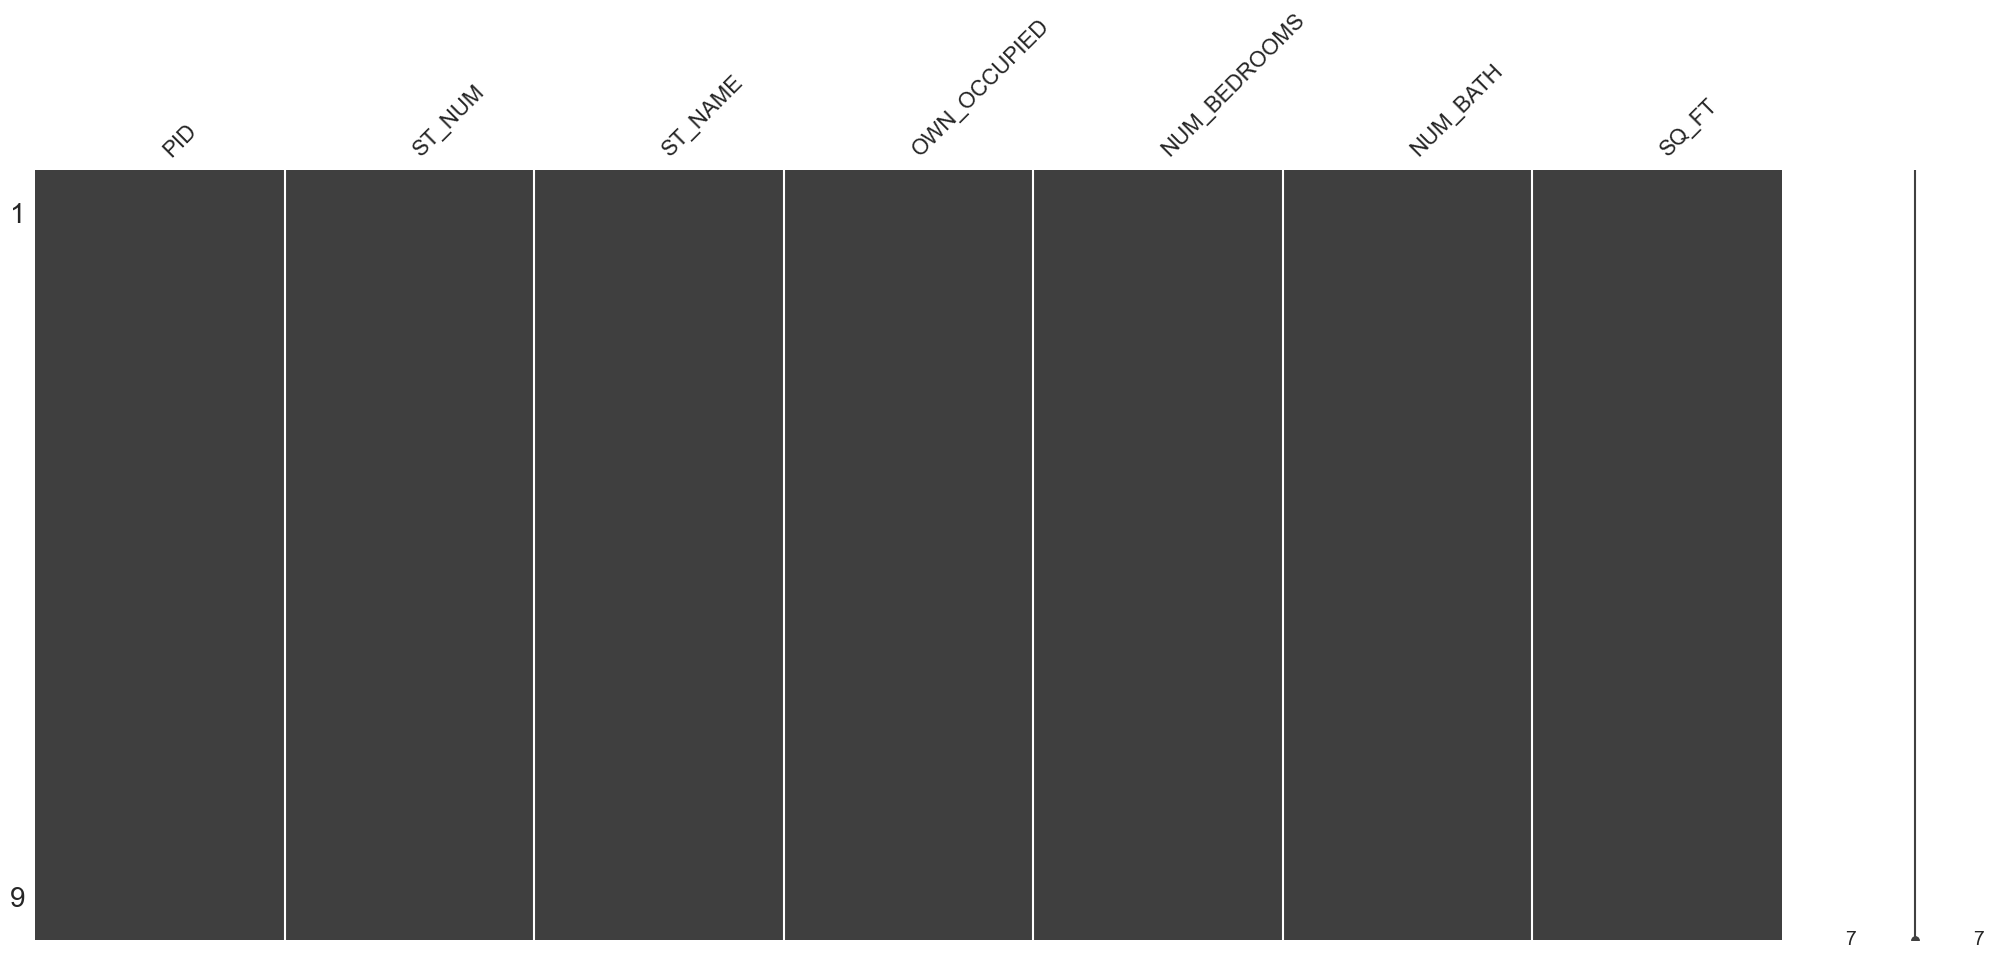

In [202]:
msno.matrix(df)
plt.plot()